In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/wheat_4.zip" "/content"

In [ ]:
!mkdir wheat1

In [ ]:
!unzip /content/wheat_4.zip -d "/content/wheat1"

Archive:  /content/wheat_4.zip
   creating: /content/wheat1/wheat_4/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_0.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_1.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_10.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_11.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_12.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_13.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/T

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
data_dir="/content/wheat1/wheat_4/Wheat-Disease-Dataset/Images"
data= tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 4506 files belonging to 4 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=10,
    validation_split=0.25
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)


In [ ]:
batch_size=32
image_size=(150,150)

In [ ]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data= val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3381 images belonging to 4 classes.
Found 1125 images belonging to 4 classes.


In [ ]:
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'Brown Rust', 1: 'Healthy', 2: 'Smut', 3: 'Yellow Rust'}


In [ ]:
def create_model(input_shape=(150, 150, 3), num_classes=4):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

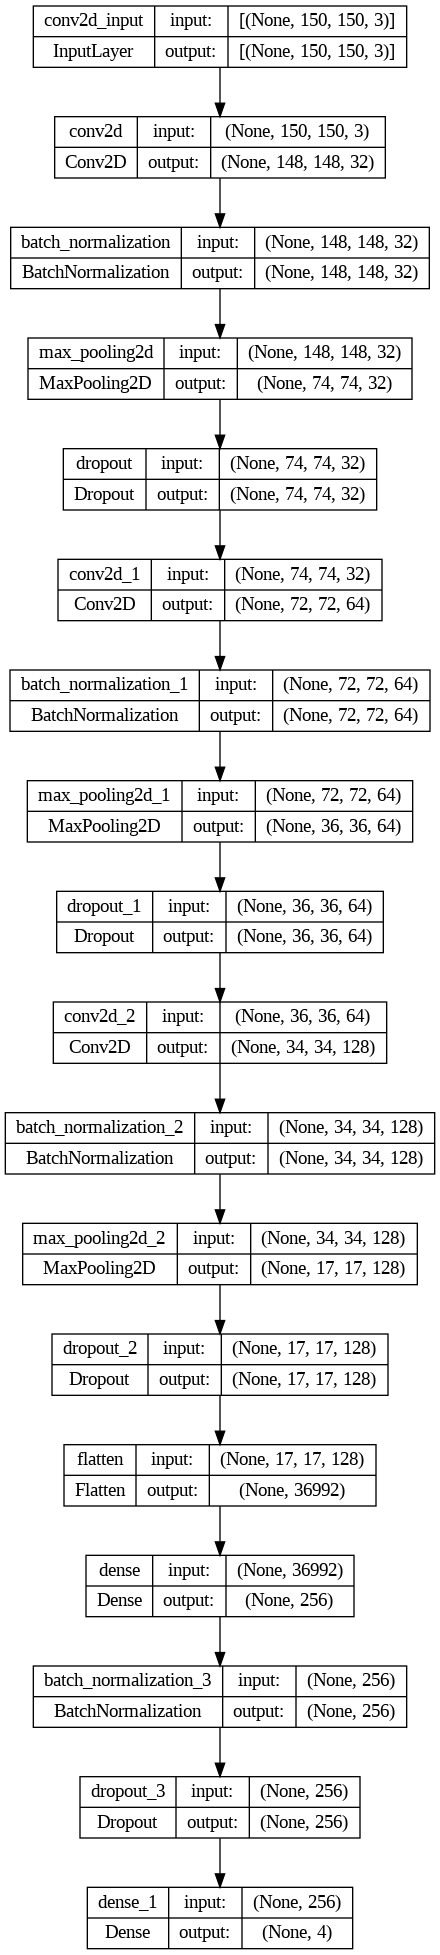

In [ ]:
tf.keras.utils.plot_model(model, "cnn_model.png", show_shapes=True)

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=30
)


Epoch 1/30
112/112 [==============================] - 78s 615ms/step - loss: 0.6273 - accuracy: 0.8016 - val_loss: 22.5563 - val_accuracy: 0.2464
Epoch 2/30
112/112 [==============================] - 64s 577ms/step - loss: 0.3727 - accuracy: 0.8721 - val_loss: 7.1718 - val_accuracy: 0.2625
Epoch 3/30
112/112 [==============================] - 63s 564ms/step - loss: 0.3387 - accuracy: 0.8805 - val_loss: 1.9466 - val_accuracy: 0.6018
Epoch 4/30
112/112 [==============================] - 65s 581ms/step - loss: 0.3008 - accuracy: 0.8954 - val_loss: 2.5993 - val_accuracy: 0.4893
Epoch 5/30
112/112 [==============================] - 63s 560ms/step - loss: 0.2402 - accuracy: 0.9166 - val_loss: 0.5836 - val_accuracy: 0.7955
Epoch 6/30
112/112 [==============================] - 67s 600ms/step - loss: 0.2445 - accuracy: 0.9158 - val_loss: 0.3124 - val_accuracy: 0.8795
Epoch 7/30
112/112 [==============================] - 66s 590ms/step - loss: 0.2534 - accuracy: 0.9102 - val_loss: 1.2178 - val_a

In [ ]:
model.save('wheat_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


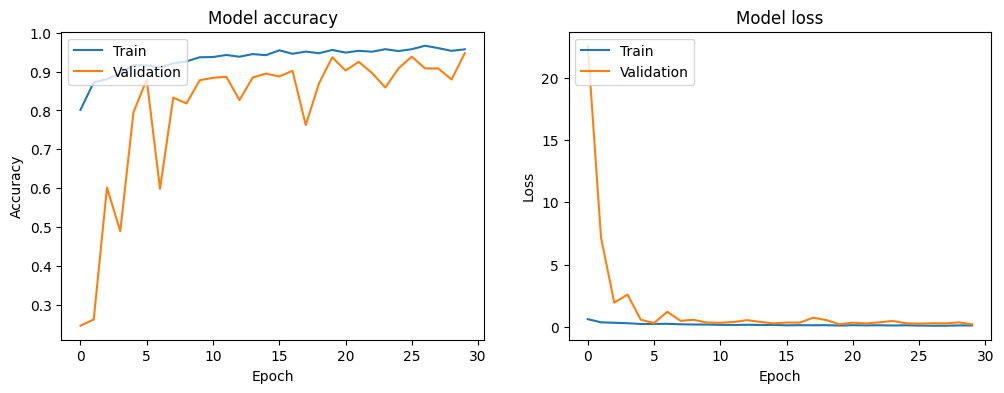

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
!cp "/content/wheat_disease_model.h5" "/content/drive/MyDrive"

cp: cannot stat '/content/wheat_disease_model.h5': No such file or directory


In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
   classes.append(key)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(filename, model, image_size=(150, 150)):
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img)

1/1 [==============================] - 0s 126ms/step


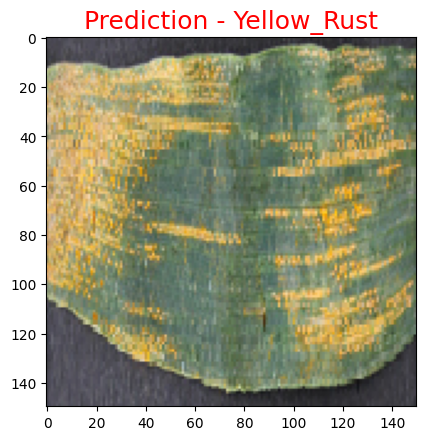

In [ ]:
predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_29.png", model)

1/1 [==============================] - 0s 35ms/step


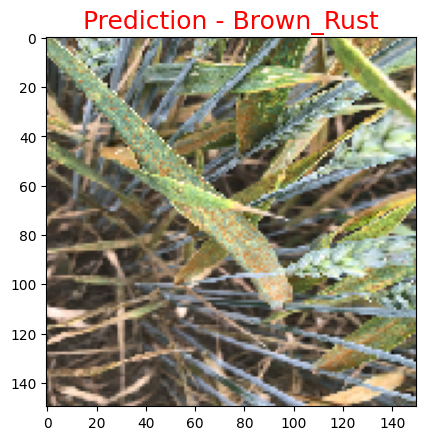

In [ ]:
predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/brown_rust_test/brown_rust_test_5.png",model)

1/1 [==============================] - 0s 31ms/step


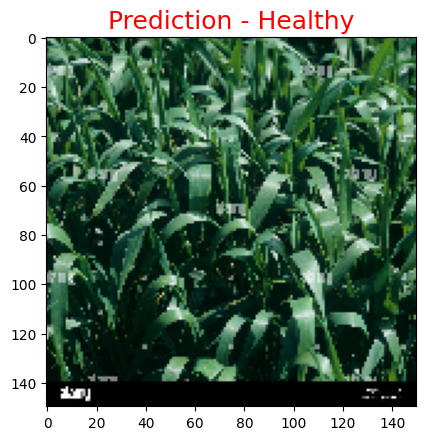

In [ ]:
predict_image("/content/healthhhhh.jpg",model)

1/1 [==============================] - 0s 21ms/step


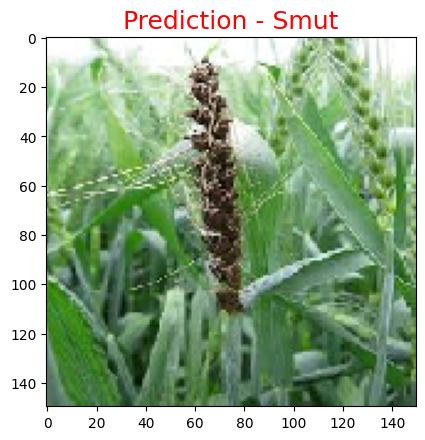

In [ ]:
predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/smut_test/smut_test_10.png",model)

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model('/content/wheat_disease_model.h5')

classes = ["Brown_rust","Healthy","Smut","Yellow_rust"]

def predict_image(filename, model, image_size=(150, 150)):
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize the image data
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img)

    predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_29.png", model)